# 4 Regression

In this task, we want to combine the acquired knowledge about data exploration, plotting and, linear correlations.
We will write a simple prediction algorithm, a univariate regression, in Python!

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

## 4.1 Get the data
We will utilize the same dataset as in _PlottingCorrelation.ipynb_.

In [2]:
diabetes = datasets.load_diabetes()

One might remember that the dataset had 10 features and 1 target. For machine learning purposes, one feature is labeled as the target because it is often the goal to predict this feature of interest out of other features.

Our task will now also be to predict the target feature (Response, "RESP"), the progression of the diabetes disease one year after baseline, via a regression.

First, we need to find which feature would be a good candidate for predicting the target. Correlation can be a good indicator for close relationships of different features.

In [3]:
data = np.concatenate((diabetes["data"], diabetes["target"].reshape(-1,1)),
                      axis=1)
names = list(diabetes["feature_names"]) + ["RESP"]
corr = np.corrcoef(data, rowvar=False)

## 4.2 Choose a predictor

### Task 4.2.1 Visualise correlation matrix
We did some quick `numpy` magic to concatenate the target values to our feature matrix and then created a correlation matrix which contains the correlation coefficients between all features.

Now, we need to plot those coefficients in a way that lets us decide which is a good predictor for our target RESP.

Try to remember how you plotted 2D matrices in Task 1.

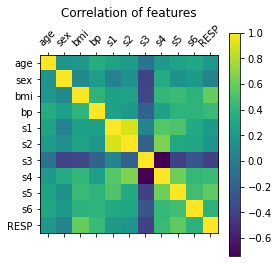

In [7]:
# Your Code here (Remember how we plotted 2D Matrices?)
plt.matshow(corr)
plt.xticks(np.arange(len(names)), labels=names, rotation=45)
plt.yticks(np.arange(len(names)), labels=names)
plt.title("Correlation of features")
plt.colorbar()
plt.show()

### Task 4.2.2 Choose a predicting feature
Now that we can easily grasp the correlations between the variables,
we should choose a predicting feature that has a high correlation with our target feature RESP (dependent variable).

Choose a predictor (independent variable) and isolate the feature in the variable _x_.

In [12]:
x = diabetes.data[:,2]
#x= diabetes.data[:,8]
resp = diabetes["target"] 

### Task 4.2.3 Plotting variables
Now that we have decided on a feature, we can plot our predictor against our target.
A scatter plot would be a good fit for this task.

**Don't forget all the information about plotting from task 1!**

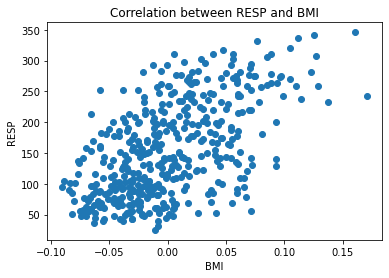

In [13]:
plt.scatter(x, resp)
plt.title("Correlation between RESP and BMI")
plt.xlabel("BMI")
plt.ylabel("RESP")
plt.show()

## 4.3 Set up the function

From the lecture, we know that the function for a linear regression is as follows:

$$ \huge y = \beta_0 + \beta_1 x + \epsilon $$

$y$ is the target or dependent variable

$\beta_0$ is the $y$-intercept

$\beta_1$ is the slope

$x$ is the predicting or independent variable

$\epsilon$ is the residual error

We need to calculate $\beta_0$ and $\beta_1$ while minimizing $\epsilon$.


### Task 4.3.1 Calculate $\beta_1$
From the lecture, we also know that we can calculate $\beta_1$ with the following equation when minimising $\epsilon$:

$$ \beta_1 = \frac{\sum_{data}(x-\bar{x})(y-\bar{y})}{\sum_{data}(x-\bar{x})^2} $$

$\bar{y}$ and $\bar{x}$ are the mean values of the variables $y$ and $x$, respectively.

Calculate $\beta_1$ and save the result in the variable _beta_one_.

In [14]:
x_mean = np.mean(x)
resp_mean = np.mean(resp)

top_sum = 0
for i in range(0, len(x)):
    top_sum += (x[i]-x_mean)*(resp[i]-resp_mean)

bottom_sum = 0
for i in range(0, len(x)):
    bottom_sum += (x[i]-x_mean)**2

beta_one = top_sum / bottom_sum

### Task 4.3.2 Calculate $\beta_0$
From the lecture, we also know that we can calculate $\beta_0$ with the following equation when minimising $\epsilon$:

$$ \beta_0 = \bar{y} - \beta_1 \bar{x}. $$

Again, $\bar{y}$ and $\bar{x}$ are the mean values of the variables y and x, respectively.

Calculate $\beta_0$ and save the result in the variable _beta_zero_.

In [15]:
beta_zero = resp_mean - beta_one * x_mean

### Task 4.3.3 Write the regression function
Now create python function that takes the independent variable as an input and returns the value of the dependent variable.

In [16]:
def regress(x):
    y = beta_zero + beta_one * x
    return y

## 4.4 Visualize the regression

### 4.4.1 Plot the regression

Recreate the plot from task 4.2.3 but this time include the regression function.

_Hint_: In order to plot the regression function, you might need to supply it with artificial datapoints. The numpy function `np.arange` can be of help here.

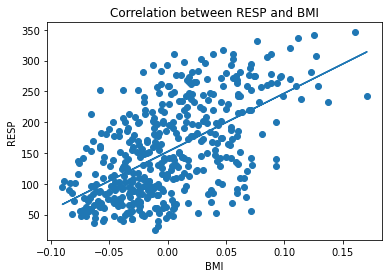

In [20]:
plt.scatter(x, resp)
plt.plot(x, regress(x), '-')
plt.title("Correlation between RESP and BMI")
plt.xlabel("BMI")
plt.ylabel("RESP")
plt.show()